This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data.

The dataset has 7752 rows and 25 columns.



In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [145]:
df=pd.read_csv("Temprature.csv")

In [146]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


The dataset has 7752 rows and 25 columns

In [147]:
df.keys

<bound method NDFrame.keys of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.00

In [148]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [150]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except date all columns data type is float

In [151]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Except lat,lon,Dem ,Slop and solar radition all columns have null values.
In next step we will remove null values

In [152]:
df["Present_Tmax"]=df["Present_Tmax"].fillna(np.mean(df["Present_Tmax"])) #Removing null values

In [153]:
df["Present_Tmin"]=df["Present_Tmin"].fillna(np.mean(df["Present_Tmin"]))

In [154]:
df["LDAPS_RHmin"]=df["LDAPS_RHmin"].fillna(np.mean(df["LDAPS_RHmin"]))

In [155]:
df["LDAPS_RHmax"]=df["LDAPS_RHmax"].fillna(np.mean(df["LDAPS_RHmax"]))

In [156]:
df["LDAPS_Tmax_lapse"]=df["LDAPS_Tmax_lapse"].fillna(np.mean(df["LDAPS_Tmax_lapse"]))

In [157]:
df["LDAPS_Tmin_lapse"]=df["LDAPS_Tmin_lapse"].fillna(np.mean(df["LDAPS_Tmin_lapse"]))

In [158]:
df["LDAPS_WS"]=df["LDAPS_WS"].fillna(np.mean(df["LDAPS_WS"]))

In [159]:
df["LDAPS_LH"]=df["LDAPS_LH"].fillna(np.mean(df["LDAPS_LH"]))

In [160]:
df["LDAPS_CC1"]=df["LDAPS_CC1"].fillna(np.mean(df["LDAPS_CC1"]))

In [161]:
df["LDAPS_CC2"]=df["LDAPS_CC2"].fillna(np.mean(df["LDAPS_CC2"]))

In [162]:
df["LDAPS_CC3"]=df["LDAPS_CC3"].fillna(np.mean(df["LDAPS_CC3"]))

In [163]:
df["LDAPS_CC4"]=df["LDAPS_CC4"].fillna(np.mean(df["LDAPS_CC4"]))

In [164]:
df["LDAPS_PPT1"]=df["LDAPS_PPT1"].fillna(np.mean(df["LDAPS_PPT1"]))

In [165]:
df["LDAPS_PPT2"]=df["LDAPS_PPT2"].fillna(np.mean(df["LDAPS_PPT2"]))

In [166]:
df["LDAPS_PPT3"]=df["LDAPS_PPT3"].fillna(np.mean(df["LDAPS_PPT3"]))

In [167]:
df["LDAPS_PPT4"]=df["LDAPS_PPT4"].fillna(np.mean(df["LDAPS_PPT4"]))

In [168]:
df["Next_Tmax"]=df["Next_Tmax"].fillna(np.mean(df["Next_Tmax"]))

In [169]:
df["Next_Tmin"]=df["Next_Tmin"].fillna(np.mean(df["Next_Tmin"]))

In [170]:
df['Date'].fillna(df['Date'].mode()[0], inplace=True)

In [171]:
df['station'].fillna(df['station'].mode()[0], inplace=True)

In [172]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.213213,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


As per above data statastics in most of the columns there is big diffrence with mean and 50% and min-max values which shows that there are outliers and data is bit skewed.

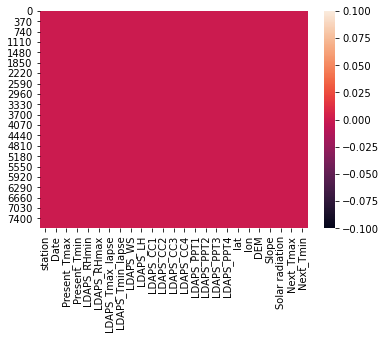

In [173]:
sns.heatmap(df.isnull())

In [174]:
dfcor=df.corr()#  Checking correlation
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112756,0.132068,-0.066780,-0.166391,0.069306,0.105009,0.004234,-0.133787,0.006728,...,-0.010773,-0.015294,-0.013279,-0.237467,-0.118603,-0.256138,-0.090461,-0.018814,0.108236,0.128659
Present_Tmax,0.112756,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.132068,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066780,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166391,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069306,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.105009,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.004234,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133787,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440
LDAPS_CC1,0.006728,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028


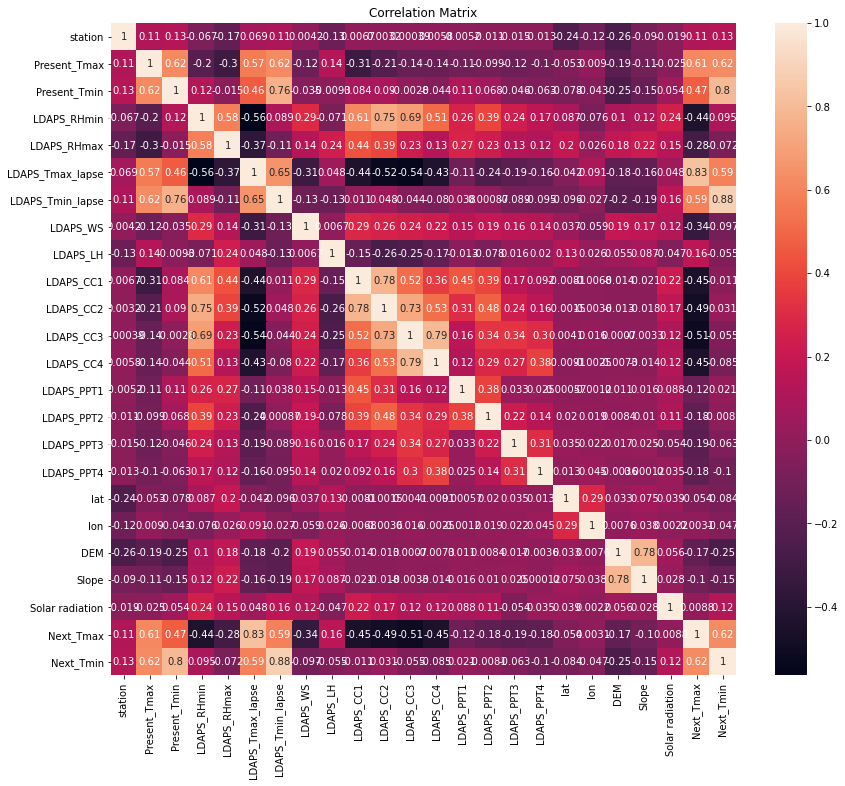

In [175]:
plt.figure(figsize=(14,12))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

some columns are positively correlated, some are moderatly and some are negatively correlated with our target variables.

In [176]:
corr_matrix=df.corr() #Checking with correlation with target variables

In [177]:
corr_matrix["Next_Tmax"].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827189
Next_Tmin           0.621427
Present_Tmax        0.610348
LDAPS_Tmin_lapse    0.586983
Present_Tmin        0.471806
LDAPS_LH            0.157616
station             0.108236
Solar radiation     0.008795
lon                 0.003052
lat                -0.053510
Slope              -0.102725
LDAPS_PPT1         -0.118817
DEM                -0.172538
LDAPS_PPT2         -0.178383
LDAPS_PPT4         -0.178718
LDAPS_PPT3         -0.194143
LDAPS_RHmax        -0.283738
LDAPS_WS           -0.342729
LDAPS_RHmin        -0.437898
LDAPS_CC4          -0.446319
LDAPS_CC1          -0.452541
LDAPS_CC2          -0.490756
LDAPS_CC3          -0.514680
Name: Next_Tmax, dtype: float64

In [178]:
corr_matrix["Next_Tmin"].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Present_Tmax        0.622741
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.586868
station             0.128659
Solar radiation     0.120212
LDAPS_RHmin         0.095019
LDAPS_CC2           0.031250
LDAPS_PPT1          0.021323
LDAPS_PPT2         -0.008058
LDAPS_CC1          -0.011028
lon                -0.046603
LDAPS_CC3          -0.054726
LDAPS_LH           -0.055440
LDAPS_PPT3         -0.062622
LDAPS_RHmax        -0.071997
lat                -0.083533
LDAPS_CC4          -0.085093
LDAPS_WS           -0.096576
LDAPS_PPT4         -0.103682
Slope              -0.146882
DEM                -0.246906
Name: Next_Tmin, dtype: float64

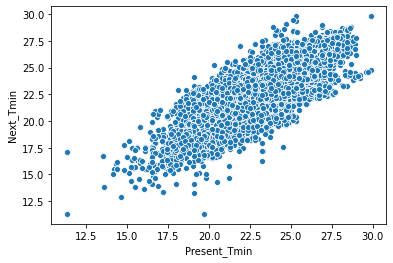

In [179]:
sns.scatterplot(x="Present_Tmin",y="Next_Tmin",data=df)

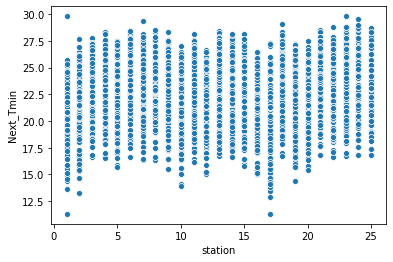

In [181]:
sns.scatterplot(x="station",y="Next_Tmin",data=df)

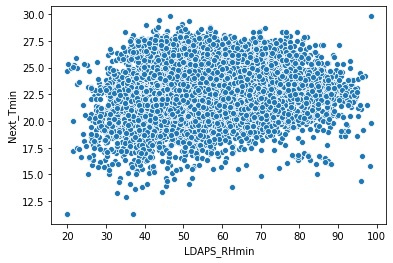

In [182]:
sns.scatterplot(x="LDAPS_RHmin",y="Next_Tmin",data=df)

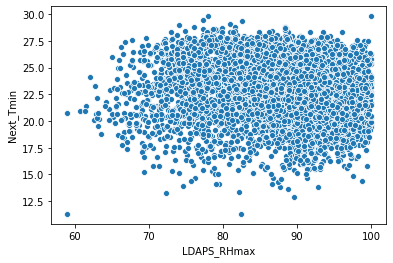

In [183]:
sns.scatterplot(x="LDAPS_RHmax",y="Next_Tmin",data=df)

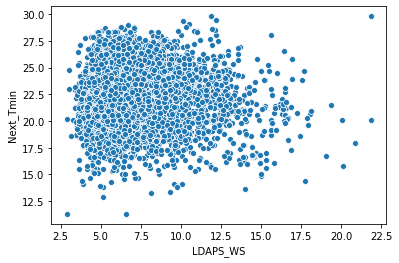

In [184]:
sns.scatterplot(x="LDAPS_WS",y="Next_Tmin",data=df)

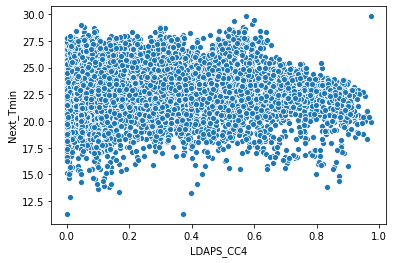

In [185]:
sns.scatterplot(x="LDAPS_CC4",y="Next_Tmin",data=df)

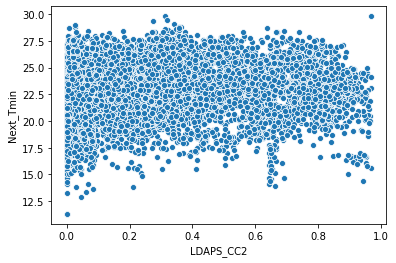

In [186]:
sns.scatterplot(x="LDAPS_CC2",y="Next_Tmin",data=df)

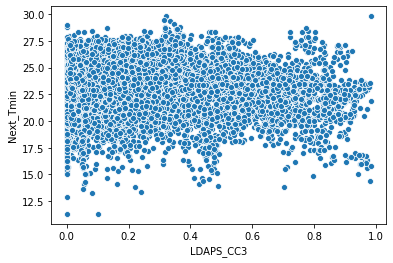

In [187]:
sns.scatterplot(x="LDAPS_CC3",y="Next_Tmin",data=df)

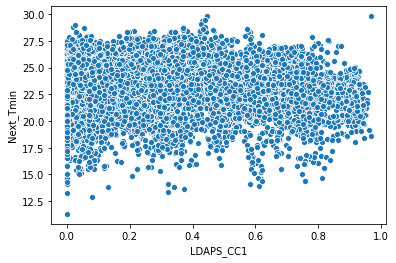

In [188]:
sns.scatterplot(x="LDAPS_CC1",y="Next_Tmin",data=df)

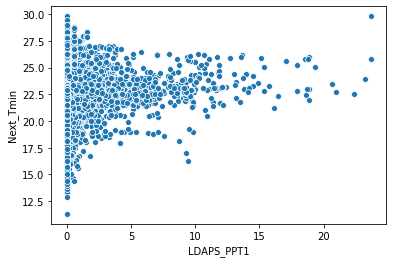

In [189]:
sns.scatterplot(x="LDAPS_PPT1",y="Next_Tmin",data=df)

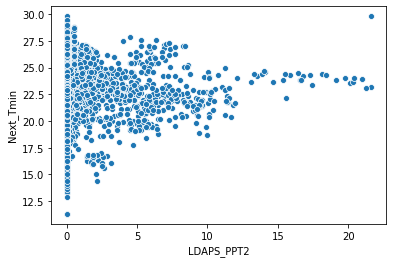

In [190]:
sns.scatterplot(x="LDAPS_PPT2",y="Next_Tmin",data=df)

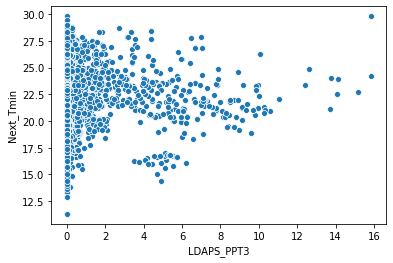

In [191]:
sns.scatterplot(x="LDAPS_PPT3",y="Next_Tmin",data=df)

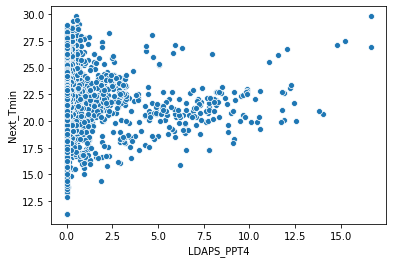

In [192]:
sns.scatterplot(x="LDAPS_PPT4",y="Next_Tmin",data=df)

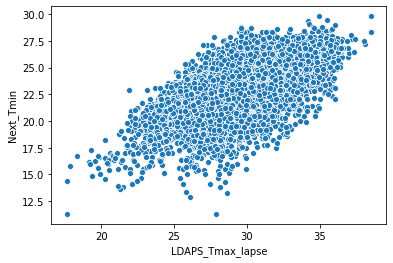

In [193]:
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmin",data=df)

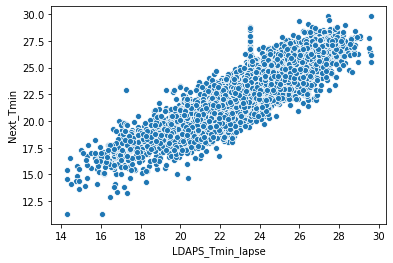

In [194]:
sns.scatterplot(x="LDAPS_Tmin_lapse",y="Next_Tmin",data=df)

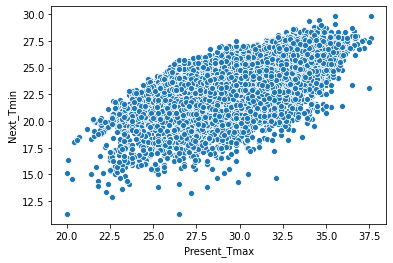

In [195]:
sns.scatterplot(x="Present_Tmax",y="Next_Tmin",data=df)

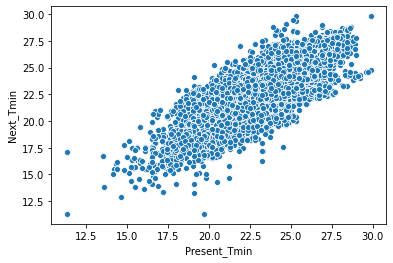

In [196]:
sns.scatterplot(x="Present_Tmin",y="Next_Tmin",data=df)

Findings of scatter plots:
    
There positive correlation of Present_Tmax,Present_Tmin with LDAPS_Tmin,lapsePresent_Tmin,Next_Tmax,LDAPS_Tmax_lapse,station
moderate with Solar radiation,LDAPS_RHmin,LDAPS_CC2,LDAPS and negative with LDAPS_PPT2,LDAPS_CC1,lon,LDAPS_CC3,LDAPS_LH,LDAPS_RHmax,lat,
LDAPS_WS,LDAPS_PPT4,Slope and DEM.     

In [197]:
for col in df.select_dtypes(['object']).columns: # Checking categorical values
    print(col, ':', sorted(df[col].unique()))

Date : ['01-07-2013', '01-07-2014', '01-07-2015', '01-07-2016', '01-07-2017', '01-08-2013', '01-08-2014', '01-08-2015', '01-08-2016', '01-08-2017', '02-07-2013', '02-07-2014', '02-07-2015', '02-07-2016', '02-07-2017', '02-08-2013', '02-08-2014', '02-08-2015', '02-08-2016', '02-08-2017', '03-07-2013', '03-07-2014', '03-07-2015', '03-07-2016', '03-07-2017', '03-08-2013', '03-08-2014', '03-08-2015', '03-08-2016', '03-08-2017', '04-07-2013', '04-07-2014', '04-07-2015', '04-07-2016', '04-07-2017', '04-08-2013', '04-08-2014', '04-08-2015', '04-08-2016', '04-08-2017', '05-07-2013', '05-07-2014', '05-07-2015', '05-07-2016', '05-07-2017', '05-08-2013', '05-08-2014', '05-08-2015', '05-08-2016', '05-08-2017', '06-07-2013', '06-07-2014', '06-07-2015', '06-07-2016', '06-07-2017', '06-08-2013', '06-08-2014', '06-08-2015', '06-08-2016', '06-08-2017', '07-07-2013', '07-07-2014', '07-07-2015', '07-07-2016', '07-07-2017', '07-08-2013', '07-08-2014', '07-08-2015', '07-08-2016', '07-08-2017', '08-07-2013'

In [202]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()
df["Date"]=LE.fit_transform(df["Date"])

station                AxesSubplot(0.125,0.772143;0.133621x0.107857)
Present_Tmax        AxesSubplot(0.285345,0.772143;0.133621x0.107857)
Present_Tmin         AxesSubplot(0.44569,0.772143;0.133621x0.107857)
LDAPS_RHmin         AxesSubplot(0.606034,0.772143;0.133621x0.107857)
LDAPS_RHmax         AxesSubplot(0.766379,0.772143;0.133621x0.107857)
LDAPS_Tmax_lapse       AxesSubplot(0.125,0.642714;0.133621x0.107857)
LDAPS_Tmin_lapse    AxesSubplot(0.285345,0.642714;0.133621x0.107857)
LDAPS_WS             AxesSubplot(0.44569,0.642714;0.133621x0.107857)
LDAPS_LH            AxesSubplot(0.606034,0.642714;0.133621x0.107857)
LDAPS_CC1           AxesSubplot(0.766379,0.642714;0.133621x0.107857)
LDAPS_CC2              AxesSubplot(0.125,0.513286;0.133621x0.107857)
LDAPS_CC3           AxesSubplot(0.285345,0.513286;0.133621x0.107857)
LDAPS_CC4            AxesSubplot(0.44569,0.513286;0.133621x0.107857)
LDAPS_PPT1          AxesSubplot(0.606034,0.513286;0.133621x0.107857)
LDAPS_PPT2          AxesSubplot(0.

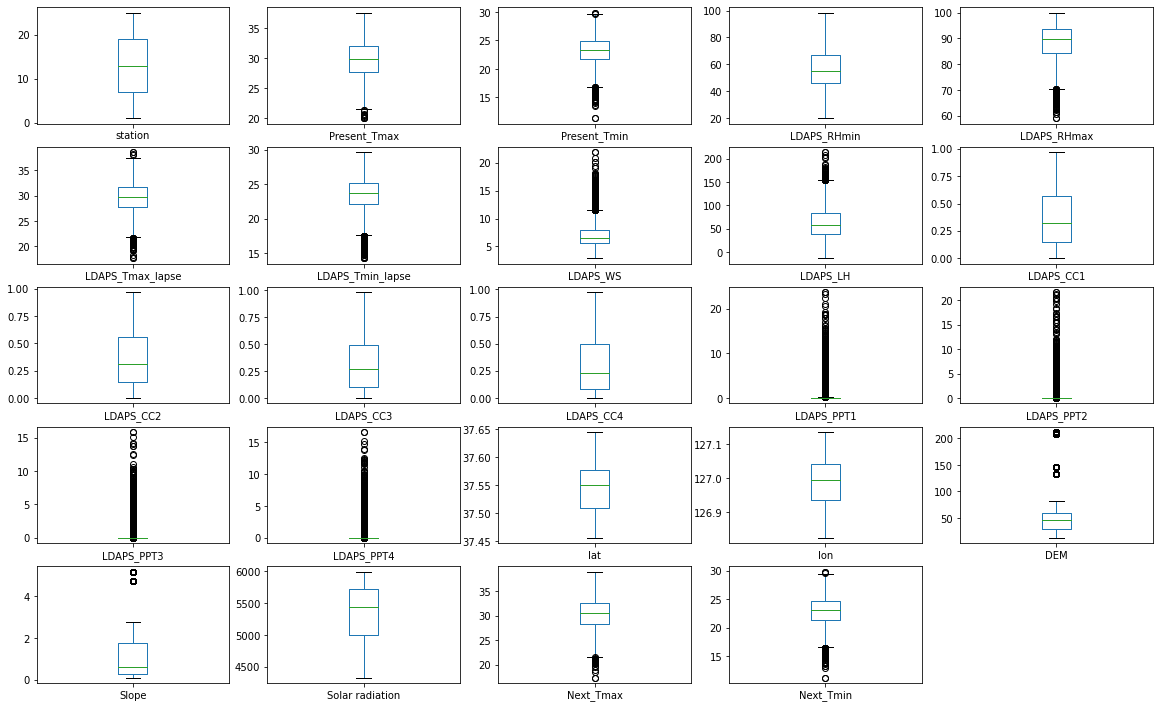

In [200]:
df.plot(kind='box',subplots=True, layout=(6,5), figsize= (20,15)) # Checking outliers

Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_ws,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LSAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmaxa d Next _Tmin has outliers. We are going to remove it with the help of ZScore

In [203]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66329184, 1.51421425, 0.36132577, ..., 1.51793488, 0.37628214,
        0.6975993 ],
       [1.52464842, 1.51421425, 0.72108401, ..., 1.22994952, 0.07209725,
        0.17406357],
       [1.38600499, 1.51421425, 0.61960809, ..., 1.21653443, 0.26425985,
        0.38974413],
       ...,
       [1.66415031, 1.67061842, 2.22171758, ..., 2.0743251 , 0.79263444,
        2.2279345 ],
       [1.66329184, 1.72558643, 3.30412736, ..., 2.35821196, 4.12345278,
        4.68452522],
       [1.66329184, 1.72558643, 2.64912642, ..., 1.51793488, 2.76237361,
        2.76579089]])

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
z[45][1]

In [ ]:
sns.pairplot(df) #to check skewness
plt.show()

In [ ]:
df.skew() #To check skewness

In [ ]:
from sklearn.preprocessing import power_transform #Removing Skewness with the help of power transfer
df_new=power_transform(df)
df_new=pd.DataFrame(df_new,columns=df.columns)

In [ ]:
# spliting the independent and target variables in x and y
x=df.drop("Next_Tmax",axis=1)
y=df["Next_Tmax"]

In [ ]:
# spliting the independent and target variables in x and y
x=df.drop("Next_Tmin",axis=1)
y=df["Next_Tmin"]

In [ ]:
from sklearn.preprocessing import StandardScaler # Scalling dataset with the help of StandardScaller
sc=StandardScaler()
x=sc.fit_transform(x)
x

Training testeing validating and hyper Tunning the system

In [214]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [215]:
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [216]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    predrf=knn.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)

best accuracy is  0.9591948779852623 on Random_state 93


In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=93)

In [218]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [219]:
predrf_test=knn.predict(x_test)

In [220]:
print(r2_score(y_test,predrf_test))

0.9591948779852623


In [221]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.9568339400032974
Mean absolute error: 0.42018703344120945
Mean squared error: 0.2928294381827422
Root mean squared error: 0.5411371713186428


In [222]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
predrf=dt.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.8372099498641368
Mean absolute error: 0.8033333333333338
Mean squared error: 1.1043333333333338
Root mean squared error: 1.0508726532426913


Validating model with cross_val score

In [223]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.8372099498641368

In [224]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor()
score=cross_val_score(knn, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.8372099498641368

In [225]:
from sklearn.model_selection import cross_val_score
dt = DecisionTreeRegressor()
score=cross_val_score(dt, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.8372099498641368

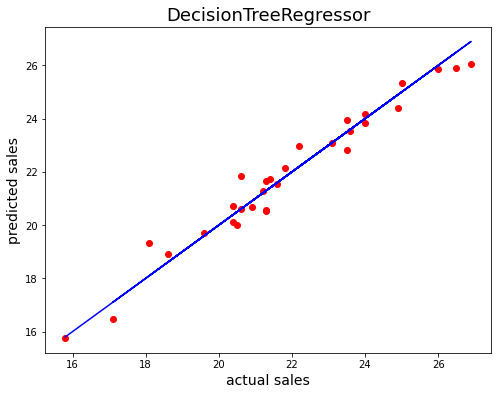

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual sales',fontsize=14)
plt.ylabel('predicted sales',fontsize=14)
plt.title('DecisionTreeRegressor',fontsize=18)
plt.show()

Our best model is DecisionTreeRegressor as it has the best accuracy after validating the data with the help of cross val

In [227]:
from sklearn.model_selection import GridSearchCV  #Hyper tuning with Gridsearch
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
dt=DecisionTreeRegressor()
grid=GridSearchCV(dt,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [230]:
dt=DecisionTreeRegressor(criterion='mse',max_features='auto')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
predrf_decision=dt.predict(x_test)
rfs=r2_score(y_test,predrf_decision)
print("R2 Score:",rfs*100)
rfscore=cross_val_score(dt,x,y,cv=5)
rfc=rfscore.mean()
print("corss val score:",rfs*100)

R2 Score: 86.61514951493838
corss val score: 86.61514951493838


After hyper tunning the model our accuracy is 86%

In [231]:
import joblib #Saving our model
joblib.dump(dt,"temprature.csv.obj")

['temprature.csv.obj']

In [232]:
p=joblib.load("temprature.csv.obj")

In [233]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,21.3,21.8
1,20.4,20.3
2,20.6,22.4
3,25.0,24.3
4,17.1,18.6
5,21.6,20.7
6,20.9,22.5
7,23.5,23.7
8,24.0,23.9
9,21.4,20.7
